In [1]:
import math
import numpy as np

In [2]:
import pandas as pd

In [3]:
%cd C:\Users\praga\Downloads\PRML\Assign1
df=pd.read_csv('Dataset.csv',header = None)

C:\Users\praga\Downloads\PRML\Assign1


In [4]:
X=df.to_numpy()

In [5]:
X

array([[ 0.143  ,  0.98493],
       [-0.30467,  0.98562],
       [ 0.46625, -0.84003],
       ...,
       [ 6.1062 , -5.9864 ],
       [-7.4094 , -5.5205 ],
       [-0.12948, -8.8036 ]])

In [6]:
K=np.array([[0.0]*1000]*1000)#initialize K

In [7]:

def kernelfunc(a,b,sigma=0.2):#func for K
    power=np.dot(a-b,a-b)
    return (math.exp((-power)/(2*sigma**2)))
# exp −(x−y)T (x−y)
# 2σ2 for σ = {0.1, 0.2, . . . , 1

In [8]:
def Kcenter_simple(K): #centering Kernel Kc
    n=1000
    Krs=np.sum(K)
    Ki=np.array([0.0]*1000) 
    Kc=np.array([[0.0]*1000]*1000)
    for i1 in range(1000):
        Ki[i1]=0
        for j1 in range(1000):
            Ki[i1]+=K[i1,j1]
            
    for i in range(1000):
        for j in range(1000):
            Kc[i,j]=K[i,j]-Ki[i]/n-Ki[j]/n+Krs/n**2
    return Kc

0.024547098180848787


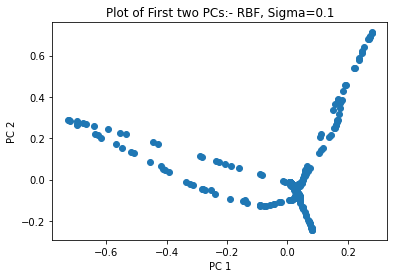

0.04563353104372015


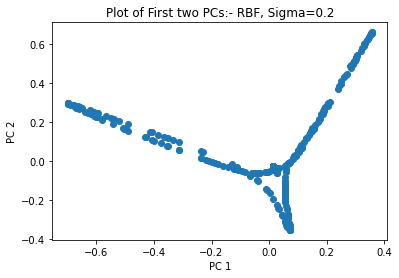

0.06441678656249614


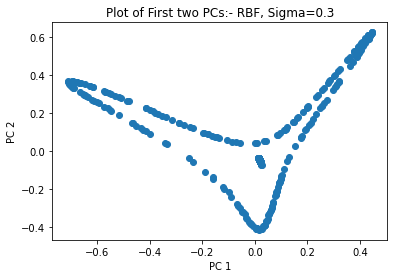

0.08110429107745094


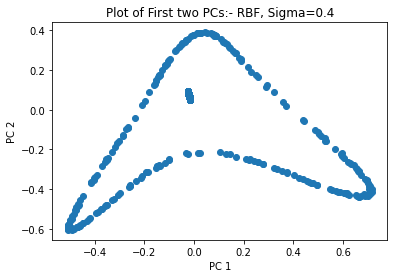

0.09625385615756901


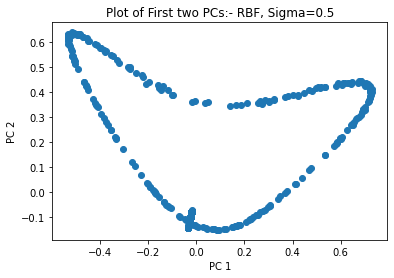

0.11094722607837149


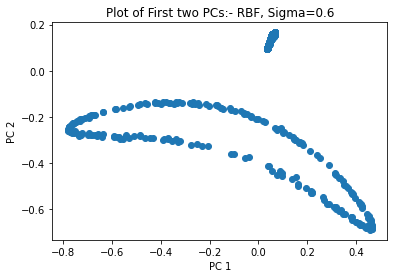

0.12460650445625852


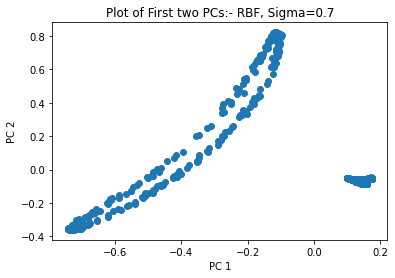

0.13648878232503142


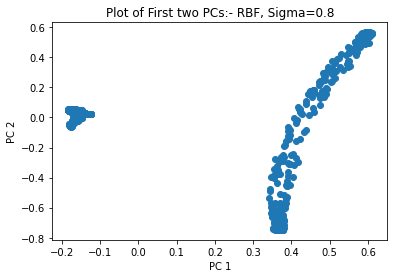

0.14681621716550483


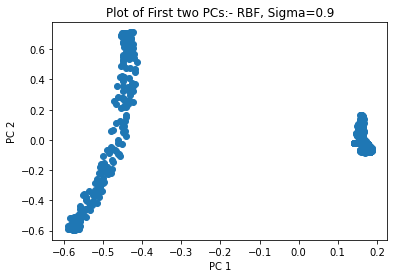

0.15646684871901018


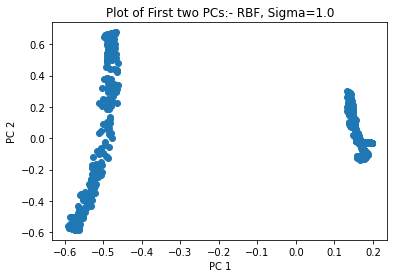

In [9]:
import matplotlib.pyplot as plt
for sigmax in range(1,11):
    for i in range(1000):#computing Kernel
        for j in range(i,1000):
            K[i,j]=K[j,i]=kernelfunc(X[i],X[j],sigmax/10)#sigmax=10*sigma
    Kc=Kcenter_simple(K)#centered Kernel
    evals, evecs = np.linalg.eigh(Kc)#gives eigen in ascending and normalized vectors
    idx = evals.argsort()[::-1] #rearranging
    evecs = evecs[:,idx]/np.sqrt(abs(evals[idx]))
    evals = evals[idx]
    print((evals[0]+evals[1])/np.sum(evals))# % var for first two eigens
    project=np.array([[0.]*1000]*1000)
    for i1 in range(1000):
        for j1 in range(1000):
            project[i1,j1]=np.dot(Kc[i1],evecs[:,j1])
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.title('Plot of First two PCs:- RBF, Sigma='+str(sigmax/10))
    plt.scatter(project[:,0],project[:,1])
    plt.show()
            
        

In [10]:
# 2.45-15.6